In [29]:
import qiskit

In [30]:
from qiskit import *

In [31]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

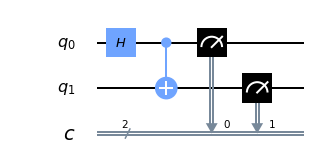

In [32]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

## Apply the quantum gates
circuit.h(q[0])
circuit.cx(q[0], q[1])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
%matplotlib inline
circuit.draw(output="mpl")

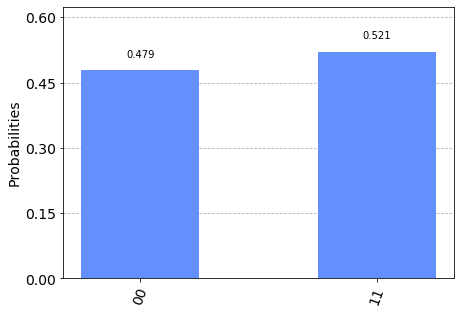

In [33]:
## First, simulate the circuit

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

## Then, plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [34]:
provider = IBMQ.get_provider('ibm-q')

# 

In [35]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [37]:
job = execute(circuit, backend=qcomp, shots=1024)

Job Status: job has successfully run


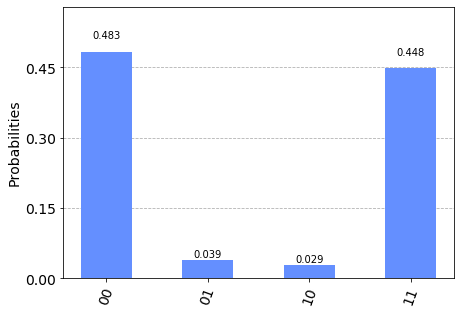

In [38]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()

# Finally, plot a histogram of the results
counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)